# Goal
Calculate the time when mesoderm invagination occurs in order to align samples in time and to start point tracking at the start of germband invagination

In [7]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

import tifffile
import av

import tqdm

import gbeflow

/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/bebi103/viz.py:30: UserWarning: DataShader import failed with error "No module named 'datashader'".
Features requiring DataShader will not work and you will get exceptions.
  Features requiring DataShader will not work and you will get exceptions.""")
/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/bebi103/viz.py:38: UserWarning: Could not import `stan` submodule. Perhaps pystan is not properly installed.
  warnings.warn('Could not import `stan` submodule. Perhaps pystan is not properly installed.')
/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/bebi103/__init__.py:19: UserWarning: Could not import `stan` submodule. Perhaps pystan is not properly installed.
  warnings.warn('Could not import `stan` submodule. Perhaps pystan is not properly installed.')


In [2]:
fs = ['20180108_htl_glc_sc11_mmzm_rotate_brt',
 '20180108_htl_glc_sc2_mmzm_wp_rotate_brt',
 '20180108_htl_glc_sc9_mmzp_rotate_brt',
 '20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt',
 '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt',
 '20180110_htl_glc_sc14_mmzp_rotate_brt',
 '20180110_htl_glc_sc15_mmzm_rotate_brt',
 '20180110_htl_glc_sc6_mmzm_rotate_brt',
 '20180112_htlglc_tl_sc11_mmzp_rotate_brt',
 '20180112_htlglc_tl_sc4_resille_rotate_brt']

Select a single sample as a test case

In [10]:
f = '20180110_htl_glc_sc14_mmzp_rotate_brt'
f

'20180110_htl_glc_sc14_mmzp_rotate_brt'

Load vector data and movie output

In [38]:
# vimg = gbeflow.load_avi_as_array(f+'.avi')
vf = gbeflow.VectorField(f)

In [27]:
expected = 35

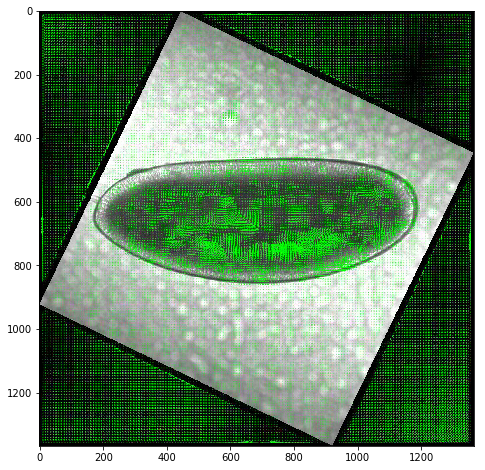

In [28]:
fig,ax = plt.subplots(figsize=(10,8))
ax.imshow(vimg[expected])

# Test metrics for detecting mesoderm invagination

Sum of y component of vectors over time

In [20]:
vf.vy.shape

(166, 270, 270)

In [25]:
ysum = np.sum(vf.vy,axis=(1,2))

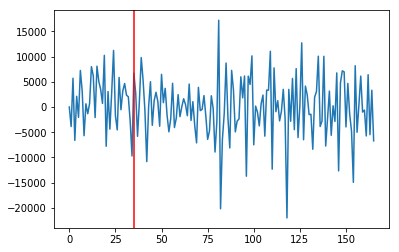

In [29]:
fig,ax = plt.subplots()
ax.plot(ysum)
ax.axvline(expected,c='r')

Try looking at the sum of only positive vy components

In [39]:
vfpos = np.copy(vf.vy)
vfpos[vfpos<0] = 0

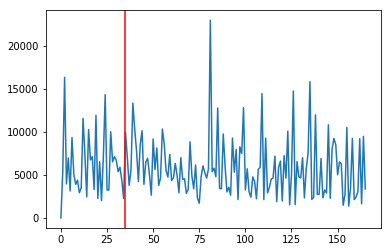

In [40]:
ysum = np.sum(vfpos,axis=(1,2))
fig,ax = plt.subplots()
ax.plot(ysum)
ax.axvline(expected,c='r')

What about within an roi

In [3]:
roi = np.s_[:,400:900,:]

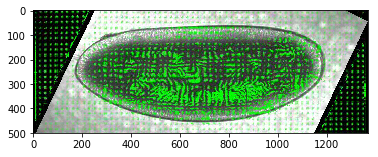

In [44]:
fig,ax = plt.subplots()
ax.imshow(vimg[roi][35])

```python
np.interp(a, (a.min(), a.max()), (-1, +1))
```

In [4]:
roirange = np.interp([400,900], (0,1368), (0,270))
roirange

array([ 78.94736842, 177.63157895])

In [5]:
vroi = np.s_[:,int(roirange[0]):int(roirange[1]),:]

In [55]:
vfpos[vroi].shape

(166, 99, 270)

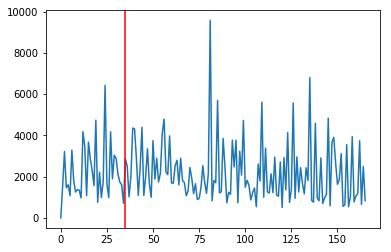

In [57]:
ysum = np.sum(vfpos[vroi],axis=(1,2))
fig,ax = plt.subplots()
ax.plot(ysum)
ax.axvline(expected,c='r')

Sum of the squared positive vy

In [60]:
ysum = np.sum(np.power(vfpos[vroi],2),axis=(1,2))

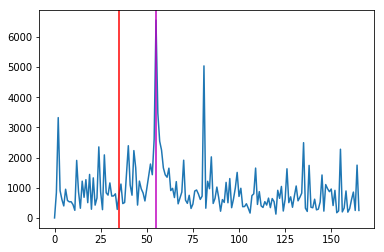

In [63]:
fig,ax = plt.subplots()
ax.plot(ysum)
ax.axvline(expected,c='r')
ax.axvline(55,c='m')

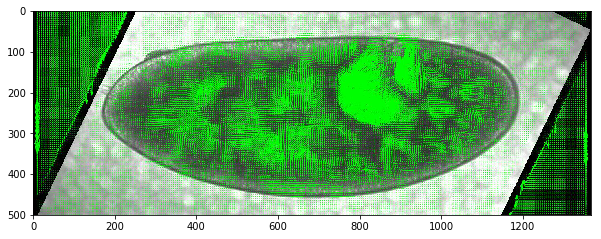

In [65]:
fig,ax = plt.subplots(figsize=(10,8))
ax.imshow(vimg[roi][55])

While we are not detecting mesoderm invagination here, this feature does mark germband extension which could be useful in itself. 

# Let's try this on other samples to see if the feature is consistent

In [6]:
Dvimg = {}
for f in fs:
    try:
        Dvimg[f] = gbeflow.load_avi_as_array(f+'.avi')
    except:
        print('Video import failed',f)

deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly
 (repeated 154 more times)
Format avi detected only with low score of 1, misdetection possible!
deprecated pixel format used, make sure you did set range correctly


Video import failed 20180108_htl_glc_sc2_mmzm_wp_rotate_brt


deprecated pixel format used, make sure you did set range correctly
 (repeated 155 more times)
deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly
 (repeated 662 more times)
Format avi detected only with low score of 1, misdetection possible!
deprecated pixel format used, make sure you did set range correctly


Video import failed 20180110_htl_glc_sc6_mmzm_rotate_brt


deprecated pixel format used, make sure you did set range correctly
 (repeated 167 more times)
Format avi detected only with low score of 1, misdetection possible!


Video import failed 20180112_htlglc_tl_sc4_resille_rotate_brt


In [23]:
from imp import reload

In [56]:
reload(gbeflow)

<module 'gbeflow' from '/Users/morganschwartz/Code/germband-extension/gbeflow/__init__.py'>

In [57]:
Dvf = {}
for f in Dvimg.keys():
    try:
        Dvf[f] = gbeflow.VectorField(f)
    except:
        print('Import failed',f)

In [8]:
Dsum = {}
for f in Dvimg.keys():
    vfpos = np.copy(Dvf[f].vy)
    vfpos[vfpos<0] = 0
    Dsum[f] = np.sum(np.power(vfpos[vroi],2),axis=(1,2))

/Users/morganschwartz/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


In [82]:
%matplotlib inline

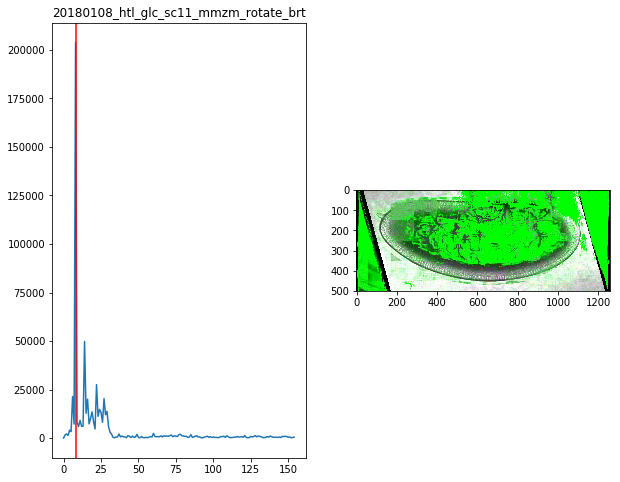

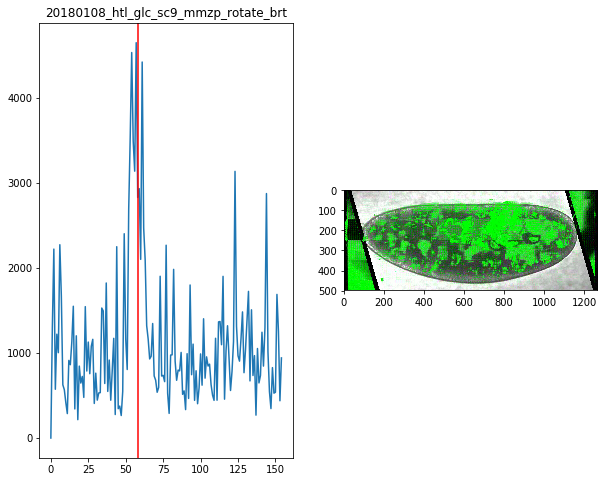

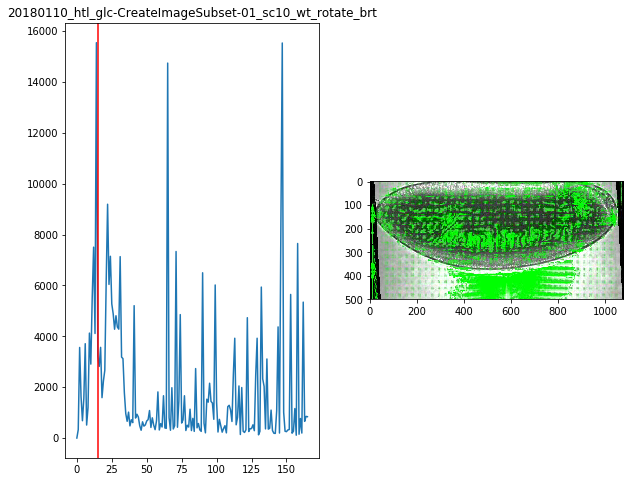

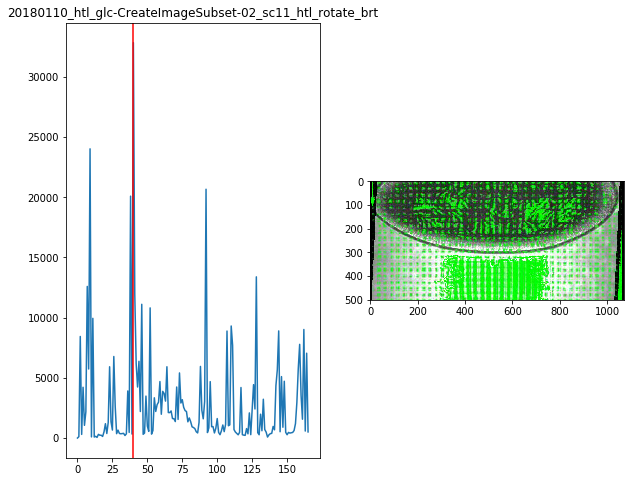

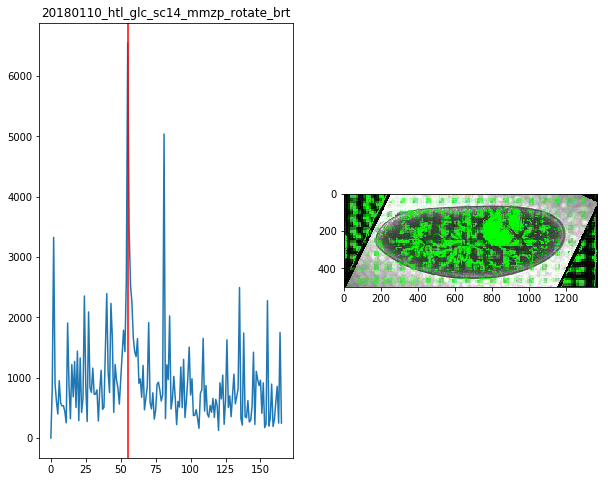

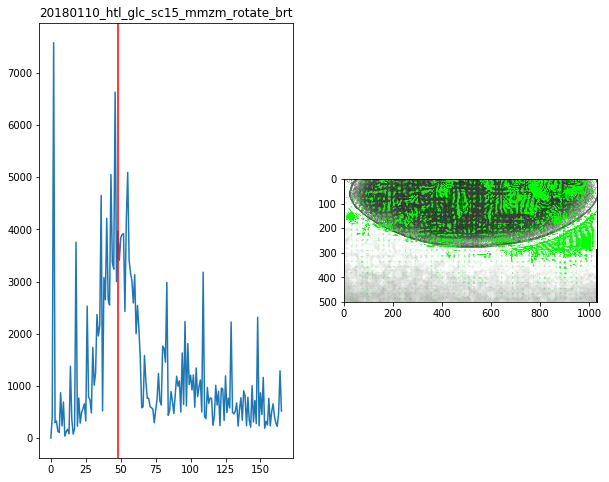

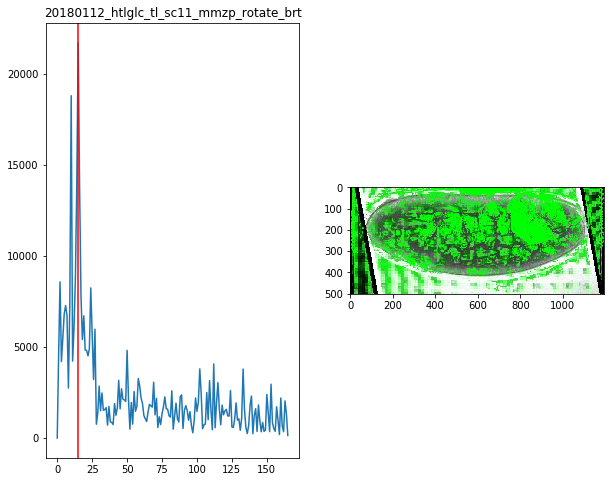

In [91]:
for f in Dsum.keys():
    fig,ax = plt.subplots(1,2,figsize=(10,8))
    ax[0].plot(Dsum[f])
    ax[0].axvline(maxsum[f],c='r')
    ax[0].set_title(f)
    ax[1].imshow(Dvimg[f][roi][maxsum[f]])

In [84]:
Dsum.keys()

dict_keys(['20180108_htl_glc_sc11_mmzm_rotate_brt', '20180108_htl_glc_sc9_mmzp_rotate_brt', '20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt', '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt', '20180110_htl_glc_sc14_mmzp_rotate_brt', '20180110_htl_glc_sc15_mmzm_rotate_brt', '20180112_htlglc_tl_sc11_mmzp_rotate_brt'])

In [27]:
maxsum = {
    '20180108_htl_glc_sc11_mmzm_rotate_brt':8,
    '20180108_htl_glc_sc9_mmzp_rotate_brt':58,
    '20180110_htl_glc-CreateImageSubset-01_sc10_wt_rotate_brt':15,
    '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt':40,
    '20180110_htl_glc_sc14_mmzp_rotate_brt':55,
    '20180110_htl_glc_sc15_mmzm_rotate_brt':48,
    '20180112_htlglc_tl_sc11_mmzp_rotate_brt':15
}


For the time being it looks like manually selecting the timepoint of mesoderm invagination will be more expedient.

# Check manual assignments

In [10]:
tpoints = pd.read_csv('mesoderm_invagination.csv')
tpoints

,File,Timepoint
0,20180110_htl_glc_sc14_mmzp_rotate_brt.avi,36
1,20180108_htl_glc_sc9_mmzp_rotate_brt.avi,36
2,20180108_htl_glc_sc11_mmzm_rotate_brt.avi,62
3,20180110_htl_glc_sc15_mmzm_rotate_brt.avi,41
4,20180110_htl_glc-CreateImageSubset-01_sc10_wt_...,16
5,20180110_htl_glc-CreateImageSubset-02_sc11_htl...,57
6,20180112_htlglc_tl_sc11_mmzp_rotate_brt.avi,4


In [102]:
tpoints[tpoints['File']==f+'.avi'].values[-1,-1]

62

In [11]:
for f in Dvimg.keys():
    fig,ax = plt.subplots(figsize=(10,8))
    t = tpoints[tpoints['File']==f+'.avi'].values[-1,-1]
    ax.imshow(Dvimg[f][t])
    ax.set_title(f)

# Test track interpolation starting at mesoderm invagination

In [12]:
tracks = pd.read_csv('20181128-tracking.csv')
tracks.head()

,Unnamed: 0,f,x,y,t,track,name,findex,xavg,yavg,xpr,ypr
0,0,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.755670,0,0,dt60,0,1280.53909,664.808244,-179.623412,-66.052575
1,1,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.755670,1,0,dt60,0,1280.53909,664.808244,-179.623412,-66.052575
2,2,20180108_htl_glc_sc11_mmzm_rotate_brt,1088.771472,573.050488,2,0,dt60,0,1280.53909,664.808244,-191.767618,-91.757756
3,3,20180108_htl_glc_sc11_mmzm_rotate_brt,1070.579972,544.532344,3,0,dt60,0,1280.53909,664.808244,-209.959118,-120.275900
4,4,20180108_htl_glc_sc11_mmzm_rotate_brt,1075.979244,528.820894,4,0,dt60,0,1280.53909,664.808244,-204.559846,-135.987350


In [14]:
starts = tracks[tracks.t==0][['f','x','y']]
starts.head()

,f,x,y
0,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.755670
166,20180108_htl_glc_sc11_mmzm_rotate_brt,1067.214981,585.575513
332,20180108_htl_glc_sc11_mmzm_rotate_brt,1093.302284,566.283025
498,20180108_htl_glc_sc11_mmzm_rotate_brt,1062.785657,534.344330
664,20180108_htl_glc_sc2_mmzm_wp_rotate_brt,1293.196414,746.576518


In [123]:
test = starts[starts.f==f].reset_index()[['x','y']]

In [128]:
for i in test.index:
    x,y = test.iloc[i]
    print(x,y)

1100.9156775841343 598.7556696428571
1067.2149814703523 585.5755133928571
1093.3022836538462 566.2830245535714
1062.785657051282 534.3443303571429


In [33]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [59]:
Ltrack = []
for f in Dvf.keys():
#     try:
    Dvf[f].calc_track_set(starts[starts.f==f].reset_index()[['x','y']],
                          60,name='dt60',timer=False,
                         tmin=maxsum[f])
    Ltrack.append(Dvf[f].tracks)
#     except:
#         print('error',f)

100%|██████████| 166/166 [00:01<00:00, 150.42it/s]


Manually code track calculation to debug

In [41]:
vf = Dvf[f]
strt = starts[starts.f==f].reset_index()[['x','y']]
x0,y0 = strt.iloc[0]

In [44]:
trange = range(maxsum[f],np.max(vf.tval))
(trange)

range(8, 165)

In [55]:
[1]*0

[]

In [48]:
xpos = [x0]*(maxsum[f]+1)
ypos = [y0]*(maxsum[f]+1)

In [49]:
for t in trange:
    dx = vf.Ldx[t].ev(xpos[t],ypos[t])
    dy = vf.Ldy[t].ev(xpos[t],ypos[t])
    
    xpos.append(xpos[t] + dx*60)
    ypos.append(ypos[t] + dy*60)

In [53]:
track.shape,len(trange)

((2, 166), 157)

In [54]:
track = np.array([xpos,ypos])
trackdf = pd.DataFrame({'x':track[0,:],'y':track[1,:],'t':vf.tval,
                        'track':[i]*track.shape[-1],
                        'name':['test']*track.shape[-1]})

In [46]:
xpos

[1100.9156775841343,
 1100.9156775841343,
 1100.9156775841343,
 1100.9156775841343,
 1100.9156775841343,
 1100.9156775841343,
 1100.9156775841343,
 1100.9156775841343]

# Track visualization

In [60]:
tracks = pd.concat(Ltrack,keys=list(Dvf.keys())
                  ).reset_index(
                  ).drop(columns=['level_1']
                  ).rename(columns={'level_0':'file'})
tracks.head()

,file,x,y,t,track,name
0,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.75567,0,0,dt60
1,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.75567,1,0,dt60
2,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.75567,2,0,dt60
3,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.75567,3,0,dt60
4,20180108_htl_glc_sc11_mmzm_rotate_brt,1100.915678,598.75567,4,0,dt60


In [18]:
%matplotlib inline

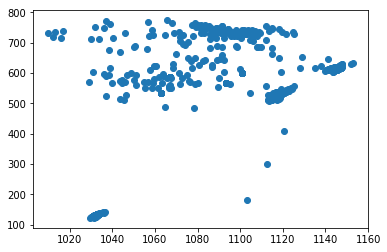

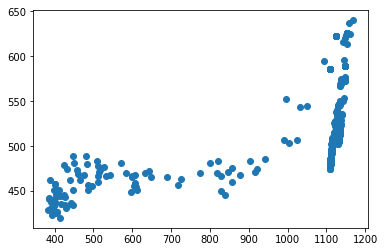

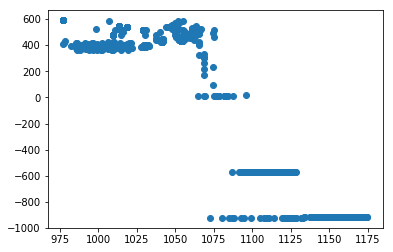

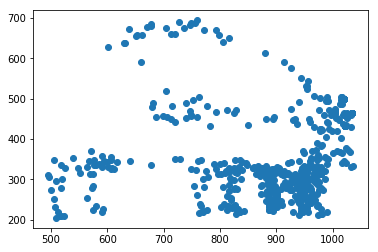

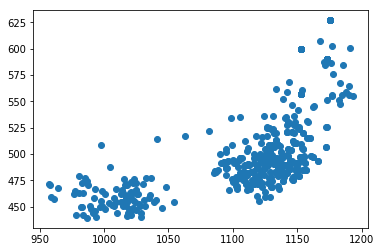

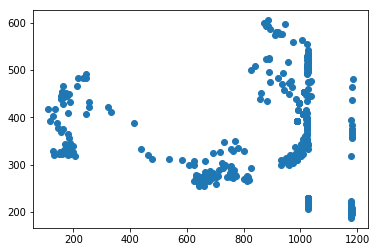

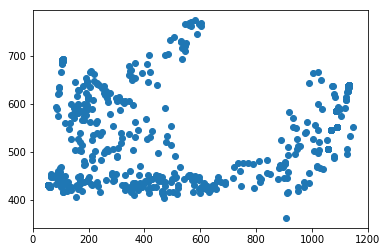

In [61]:
for f in tracks['file'].unique():
    fig,ax = plt.subplots()
    sb = tracks[tracks['file']==f]
    ax.scatter(sb.x,sb.y)#,c=sb.t,cmap='plasma')

In [62]:
for f in tracks['file'].unique():
    gbeflow.make_track_movie(Dvimg[f],tracks[tracks.file==f],c='r',
                            name='20181202_'+f+'_tracks')

100%|██████████| 168/168 [00:21<00:00,  7.46it/s]


Attempting to start interpolating the tracks at the time of mesoderm invagination does not appear to improve the results of the tracking since there is still a large fraction that wanders out of the frame entirely.